In [72]:
!pip install Sastrawi

In [73]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [74]:
def emoji_handling(review):
    emoji = []
    for word in review:
        #Smile -- :), : ), :-), (:, ( :, (-:, :')
        word = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))','POS',word)

        #Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
        word = re.sub(r'(:\s?D|:-D|x-?D|X-?D)','POS',word)

        # Sad -- :-(, : (, :(, ):, )-:
        word = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' NEG ', word)

        # Cry -- :,(, :'(, :"(, T_T
        word = re.sub(r'(:,\(|:\'\(|:"\(|T_T)', ' NEG ', word)

        emoji.append(word)
    return emoji

In [75]:
def punct_handling(review):
    #menghilangkan tanda baca
    preprocess_review = []
    for word in review:
        word = word.strip('\'"?!,.():;')

        #mengkonversi huruf vocal lebih dari satu dan berurutan
        word_character = re.compile(r"(.)\1+", re.DOTALL)
        word = word_character.sub(r"\1\1", word)

        #menghilangkan tanda - & '
        word = re.sub(r'(-|\')','',word)

        preprocess_review.append(word.lower())
    return preprocess_review

In [76]:
def preprocess_review(review):
    return punct_handling(emoji_handling(review))

### 3. Stemming

In [77]:
def stem_sentences(review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(review)


### 4. Negative Handling

In [78]:
def negative_handling(review):
    negative_review = []
    for i in range(len(review)):
        word = review[i]
        if review[i-1] != 'tidak':
            negative_review.append(word)
        else:
            word = 'tidak_'+word
            negative_review.append(word)
    return negative_review


## Fitur Klasifikasi

In [79]:
def create_freqwords(reviewHandled):
    freqOfWord = {}
    for sentence in reviewHandled:
        for word in sentence:
            if word in freqOfWord:
                freqOfWord[word] += 1
            else:
                freqOfWord[word] = 1
    return freqOfWord

In [80]:
def get_featureextract(review):
    words = set(review)
    features = {}
    for word in feature_list.keys():
        features['contains(%s)' % word] = (word in words)
    return features

## Klasifikasi Naive Bayes

### Import data

In [81]:
import nltk

# Unduh resource yang dibutuhkan
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
stop_words_indo = get_stopword('stopwordsindo.txt')
stop_words_eng = stopwords.words('english')

### Preprocessing

## Dengan Ekstraksi Fitur Contains Words

In [83]:
num_true = 0
for k,val in enumerate(validation_test):
    if val==sentiment_test[k]:
        num_true+=1
accuracy = (num_true/len(reviews_test))*100
accuracy

0.0

In [84]:
import nltk

# Unduh resource yang dibutuhkan
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#sentiment analysis yang benar punya kita

In [85]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Fungsi untuk membuka file CSV dan mengambil review dan sentimen
def open_file(file_name):
    with open(file_name, encoding="utf-8") as csvfile:
        next(csvfile)  # Mengabaikan header
        rawArticles = csv.reader(csvfile, delimiter=',')
        all_reviews = []
        all_sentiments = []
        for row in rawArticles:
            all_reviews.append((row[3].lower()).split())  # Mengambil konten review (kolom ke-4)
            all_sentiments.append(row[5].lower())  # Mengambil sentimen (kolom ke-6)
    return all_reviews, all_sentiments

# Fungsi untuk mengambil stopwords dari file
def get_stopword(stopwordsfile):
    stopwords_list = []
    with open(stopwordsfile, 'r') as file_stopwords:
        for row in file_stopwords:
            stopwords_list.append(row.strip())
    return stopwords_list

# Fungsi untuk menghapus stopwords dan kata yang tidak diperlukan
def stopword_removal(review, stop_words_indo, stop_words_eng):
    feature_vector = []
    list_no = ['ga', 'engga', 'enggak', 'gak', 'nggak', 'ngga', 'tdk']
    for word in review:
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", word)  # Menghilangkan karakter selain huruf
        if word in stop_words_indo or val is None or word in stop_words_eng:
            continue
        else:
            if word in list_no:
                word = 'tidak'
            feature_vector.append(word)
    return feature_vector

# Fungsi untuk menangani emoji
def emoji_handling(review):
    emoji = []
    for word in review:
        word = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', 'POS', word)
        word = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', 'POS', word)
        word = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', 'NEG', word)
        word = re.sub(r'(:,\(|:\'\(|:"\(|T_T)', 'NEG', word)
        emoji.append(word)
    return emoji

# Fungsi untuk menangani tanda baca
def punct_handling(review):
    preprocess_review = []
    for word in review:
        word = word.strip('\'"?!,.():;')
        word_character = re.compile(r"(.)\1+", re.DOTALL)
        word = word_character.sub(r"\1\1", word)
        word = re.sub(r'(-|\')', '', word)
        preprocess_review.append(word.lower())
    return preprocess_review

# Fungsi untuk proses pembersihan lengkap
def preprocess_review(review):
    return punct_handling(emoji_handling(review))

# Fungsi untuk stem (mengembalikan kata ke bentuk dasarnya)
def stem_sentences(review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(review)

# Fungsi untuk menangani kata negatif
def negative_handling(review):
    negative_review = []
    for i in range(len(review)):
        word = review[i]
        if review[i-1] != 'tidak':
            negative_review.append(word)
        else:
            word = 'tidak_' + word
            negative_review.append(word)
    return negative_review

# Fungsi untuk ekstraksi fitur menggunakan TF-IDF
def get_tfidf_features(reviews_train, reviews_test):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(reviews_train)
    X_test_tfidf = tfidf_vectorizer.transform(reviews_test)
    return X_train_tfidf, X_test_tfidf

# Fungsi untuk melatih dan menguji model Naive Bayes
def train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test):
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix

# Main Code
nltk.download('stopwords')

# Ambil stopwords Indo dan Inggris
stop_words_indo = get_stopword('stopwordsindo.txt')
stop_words_eng = stopwords.words('english')

# Baca file CSV
all_reviews, all_sentiments = open_file('sorted_data skinaqua (1).csv')

# Proses review untuk pembersihan
preprocessed_reviews = []
for review in all_reviews:
    feature_vector = stopword_removal(preprocess_review(review), stop_words_indo, stop_words_eng)
    preprocessed_reviews.append(' '.join(feature_vector))

# Bagi data menjadi train dan test
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(preprocessed_reviews, all_sentiments, test_size=0.2, random_state=42)

# Ekstraksi fitur TF-IDF
X_train_tfidf, X_test_tfidf = get_tfidf_features(reviews_train, reviews_test)

# Latih dan evaluasi model
accuracy, conf_matrix = train_and_evaluate(X_train_tfidf, X_test_tfidf, sentiment_train, sentiment_test)

# Output hasil evaluasi
print(f"Akurasi: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Akurasi: 72.00%
Confusion Matrix:
[[ 0  0  1]
 [ 0  0  6]
 [ 0  0 18]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

Akurasi: 96.00%
Confusion Matrix:
[[ 0  1]
 [ 0 24]]
Classification Report:
              precision    recall  f1-score   support

      netral       0.00      0.00      0.00         1
     positif       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25



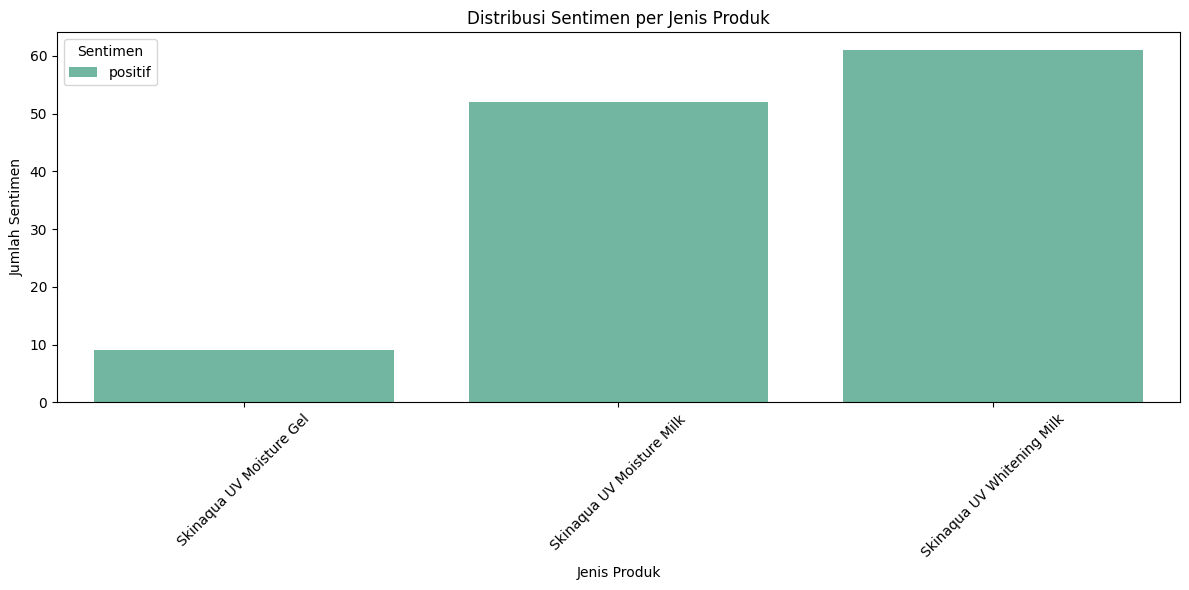

In [86]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membuka file CSV dan mengambil data
def open_file(file_name):
    df = pd.read_csv(file_name, encoding="utf-8")
    return df

# Fungsi untuk mengambil stopwords dari file
def get_stopword(stopwordsfile):
    stopwords_list = []
    with open(stopwordsfile, 'r') as file_stopwords:
        for row in file_stopwords:
            stopwords_list.append(row.strip())
    return stopwords_list

# Fungsi untuk menghapus stopwords dan kata yang tidak diperlukan
def stopword_removal(review, stop_words_indo, stop_words_eng):
    feature_vector = []
    list_no = ['ga', 'engga', 'enggak', 'gak', 'nggak', 'ngga', 'tdk']
    for word in review.split():
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", word)  # Menghilangkan karakter selain huruf
        if word in stop_words_indo or val is None or word in stop_words_eng:
            continue
        else:
            if word in list_no:
                word = 'tidak'
            feature_vector.append(word)
    return ' '.join(feature_vector)

# Fungsi untuk proses pembersihan lengkap
def preprocess_review(review):
    word = re.sub(r'[^\w\s]', '', review)  # Menghapus tanda baca
    return word.lower()

# Fungsi untuk stem (mengembalikan kata ke bentuk dasarnya)
def stem_sentences(review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(review)

# Fungsi untuk ekstraksi fitur menggunakan TF-IDF
def get_tfidf_features(reviews_train, reviews_test):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(reviews_train)
    X_test_tfidf = tfidf_vectorizer.transform(reviews_test)
    return X_train_tfidf, X_test_tfidf, tfidf_vectorizer

# Fungsi untuk melatih dan menguji model Naive Bayes
def train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test):
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Adjust target names dynamically based on labels present in the test data
    present_labels = list(set(y_test))  # Unique labels in test data
    report = classification_report(y_test, y_pred, target_names=present_labels)
    return accuracy, conf_matrix, report, model

# Fungsi untuk visualisasi jumlah sentimen berdasarkan jenis produk
def visualize_sentiment_by_product(df, product_column, sentiment_column, selected_products):
    filtered_df = df[df[product_column].isin(selected_products)]
    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x=product_column, hue=sentiment_column, palette="Set2")
    plt.title("Distribusi Sentimen per Jenis Produk")
    plt.xlabel("Jenis Produk")
    plt.ylabel("Jumlah Sentimen")
    plt.legend(title="Sentimen")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main Code
nltk.download('stopwords')

# Ambil stopwords Indo dan Inggris
stop_words_indo = get_stopword('stopwordsindo.txt')
stop_words_eng = stopwords.words('english')

# Baca file CSV
file_name = 'sorted_data skinaqua (1).csv'
df = open_file(file_name)

# Ambil kolom review dan sentimen
all_reviews = df.iloc[:, 3].astype(str).str.lower()  # Asumsi kolom review di kolom ke-4
all_sentiments = df.iloc[:, 5].astype(str)  # Asumsi kolom sentimen di kolom ke-6

# Map angka sentimen menjadi kategori
label_mapping = {'5': 'positif', '4': 'positif', '3': 'netral', '2': 'netral', '1': 'negatif'}
all_sentiments = [label_mapping[sent] for sent in all_sentiments]

# Proses review untuk pembersihan
preprocessed_reviews = []
for review in all_reviews:
    cleaned_review = stopword_removal(preprocess_review(review), stop_words_indo, stop_words_eng)
    stemmed_review = stem_sentences(cleaned_review)
    preprocessed_reviews.append(stemmed_review)

# Bagi data menjadi train dan test
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(preprocessed_reviews, all_sentiments, test_size=0.2, random_state=42)

# Ekstraksi fitur TF-IDF
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = get_tfidf_features(reviews_train, reviews_test)

# Latih dan evaluasi model
accuracy, conf_matrix, report, model = train_and_evaluate(X_train_tfidf, X_test_tfidf, sentiment_train, sentiment_test)

# Output hasil evaluasi
print(f"Akurasi: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Prediksi sentimen untuk semua data
preprocessed_full_reviews = [stopword_removal(preprocess_review(review), stop_words_indo, stop_words_eng) for review in all_reviews]
X_full_tfidf = tfidf_vectorizer.transform(preprocessed_full_reviews)
predicted_sentiments = model.predict(X_full_tfidf)

# Tambahkan kolom hasil prediksi ke dataset asli
df['Predicted Sentiment'] = predicted_sentiments

# Simpan hasil ke file baru
df.to_csv('review_with_sentiment.csv', index=False)

# Visualisasi sentimen untuk jenis produk yang dipilih
selected_products = ['Skinaqua UV Moisture Gel', 'Skinaqua UV Moisture Milk', 'Skinaqua UV Whitening Milk']
visualize_sentiment_by_product(df, 'Jenis_Produk', 'Predicted Sentiment', selected_products)


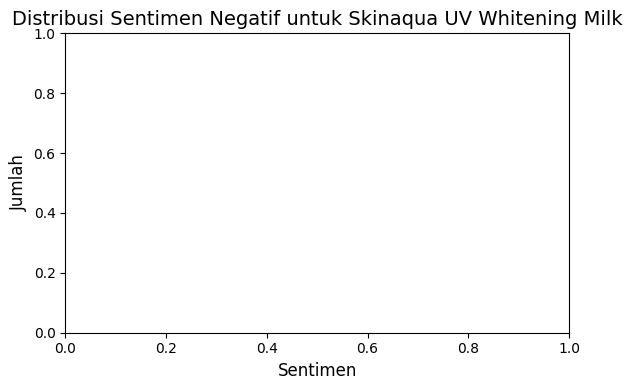

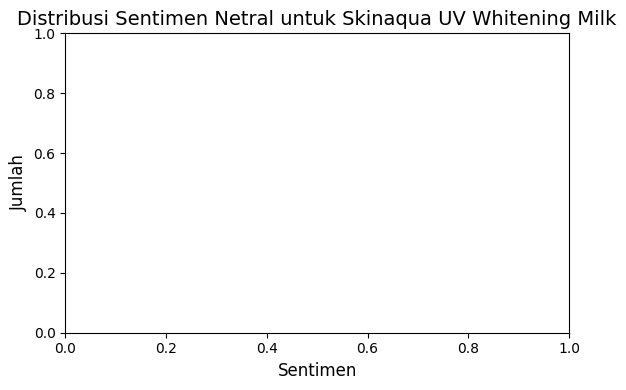

<ipython-input-87-b9b1f10f6ab9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'positif'],


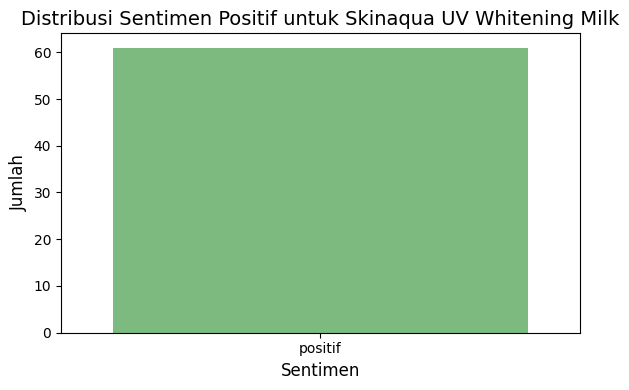

In [87]:
# Filter data untuk produk 'Skinaqua UV Whitening Milk'
product_name = 'Skinaqua UV Whitening Milk'
filtered_df = df[df['Jenis_Produk'] == product_name]

# Plot untuk sentimen negatif
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'negatif'],
              x='Predicted Sentiment', palette='Reds')
plt.title(f"Distribusi Sentimen Negatif untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()

# Plot untuk sentimen netral
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'netral'],
              x='Predicted Sentiment', palette='Blues')
plt.title(f"Distribusi Sentimen Netral untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()

# Plot untuk sentimen positif
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'positif'],
              x='Predicted Sentiment', palette='Greens')
plt.title(f"Distribusi Sentimen Positif untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()


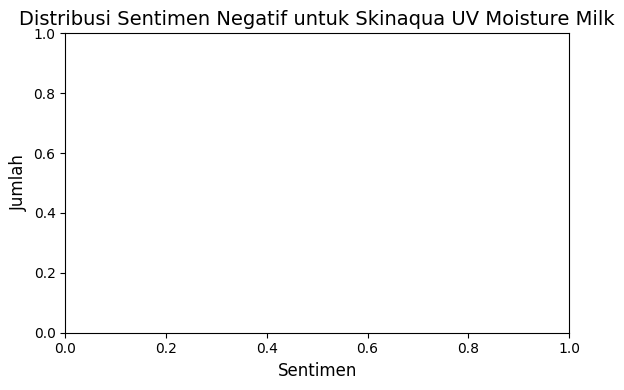

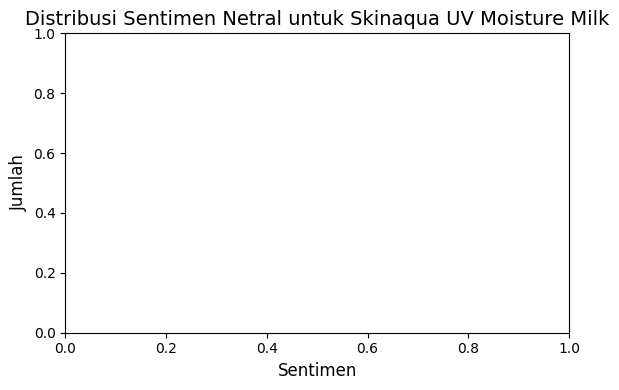

<ipython-input-88-0c4293e11fac>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'positif'],


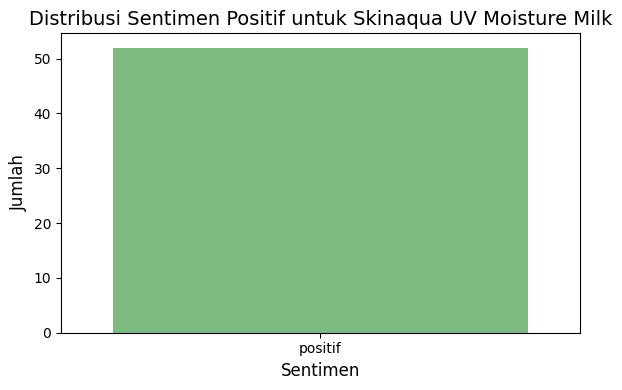

In [88]:
# Filter data untuk produk 'Skinaqua UV Whitening Milk'
product_name = 'Skinaqua UV Moisture Milk'
filtered_df = df[df['Jenis_Produk'] == product_name]

# Plot untuk sentimen negatif
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'negatif'],
              x='Predicted Sentiment', palette='Reds')
plt.title(f"Distribusi Sentimen Negatif untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()

# Plot untuk sentimen netral
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'netral'],
              x='Predicted Sentiment', palette='Blues')
plt.title(f"Distribusi Sentimen Netral untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()

# Plot untuk sentimen positif
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'positif'],
              x='Predicted Sentiment', palette='Greens')
plt.title(f"Distribusi Sentimen Positif untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()


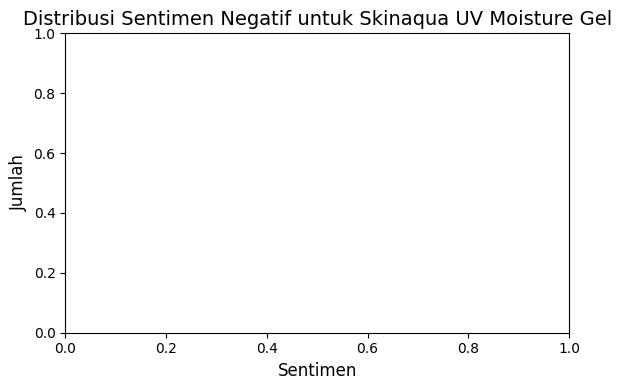

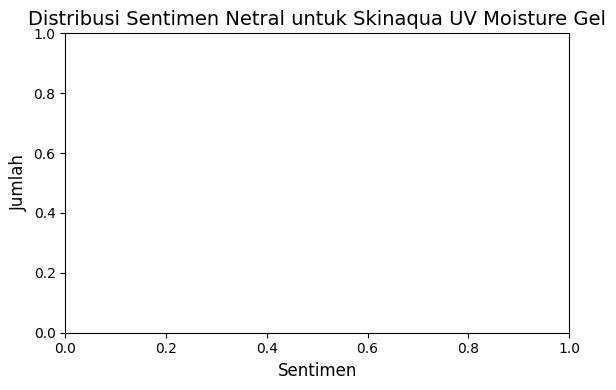

<ipython-input-89-a4600f6c3b97>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'positif'],


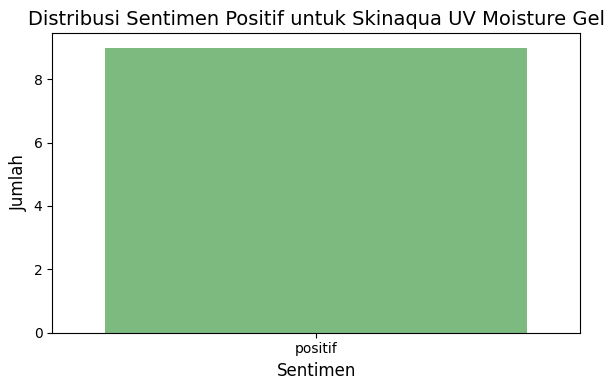

In [89]:
# Filter data untuk produk 'Skinaqua UV Whitening Milk'
product_name = 'Skinaqua UV Moisture Gel'
filtered_df = df[df['Jenis_Produk'] == product_name]

# Plot untuk sentimen negatif
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'negatif'],
              x='Predicted Sentiment', palette='Reds')
plt.title(f"Distribusi Sentimen Negatif untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()

# Plot untuk sentimen netral
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'netral'],
              x='Predicted Sentiment', palette='Blues')
plt.title(f"Distribusi Sentimen Netral untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()

# Plot untuk sentimen positif
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df[filtered_df['Predicted Sentiment'] == 'positif'],
              x='Predicted Sentiment', palette='Greens')
plt.title(f"Distribusi Sentimen Positif untuk {product_name}", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd

# Buat DataFrame untuk menampilkan hasil pemrosesan
df = pd.DataFrame({
    'Review Content': all_reviews[:10],  # Ambil 10 review pertama
    'Sentiment': all_sentiments[:10]     # Ambil 10 sentimen pertama
})

# Tampilkan hasil
print(df.head(10))


                                      Review Content Sentiment
0  aku biasa pake sunscreen ini buat dirumah aja ...   positif
1  sunscreen yang paling sering aku repurchase it...   positif
2  suka sekali sama varian yang ini. padahal untu...   positif
3  sukaa bangett sama tekstur sunscreennyaaa!!! c...   positif
4  teksturnya kaya lotion, putih pekat tp begitu ...   positif
5  sunscreen yang udah krg lebih 5 tahun selalu p...   positif
6  first time pake sunscreen ini kaget banget kar...   positif
7  pertama kali memakai ini sekitaran 2 tahun yg ...   positif
8  mungkin cocok²an kali ya, soalnya di aku kuren...    netral
9  skin aqua sunscreen warna biru ini sempat aku ...   positif
